In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import joblib

with open("sampler_27-Aug-2020.pkl", "rb") as f:
    sampler = joblib.load(f)

with open("fit_inputs.pkl", "rb") as f:
    

In [67]:
def get_sampler_statistics(
    sampler ,
    param_names=None,
    min_iter = None,
    max_iter = None,
):
    _, _, nparams = sampler.chain.shape
    param_names = param_names or [f"param_{i}" for i in range(nparams)]
    assert len(param_names)==nparams, \
        "Number of param_names must equal number of parameters in sampler."
    
    iter_range = slice(min_iter, max_iter)
    params = {}
    for i, param_name in enumerate(param_names):

        mean = np.mean(sampler.chain[:, iter_range, i])
        stddev = np.std(sampler.chain[:, iter_range, i])
        params[param_name] = {
            "mean": mean,
            "stddev": stddev
        }
    return params

In [71]:
get_sampler_statistics(sampler, min_iter=2, max_iter=3)

(20, 1)
(20, 1)


{'param_0': {'mean': 93.66655356255475, 'stddev': 48.10106303560913},
 'param_1': {'mean': 100.35102273596428, 'stddev': 47.584546269478935}}

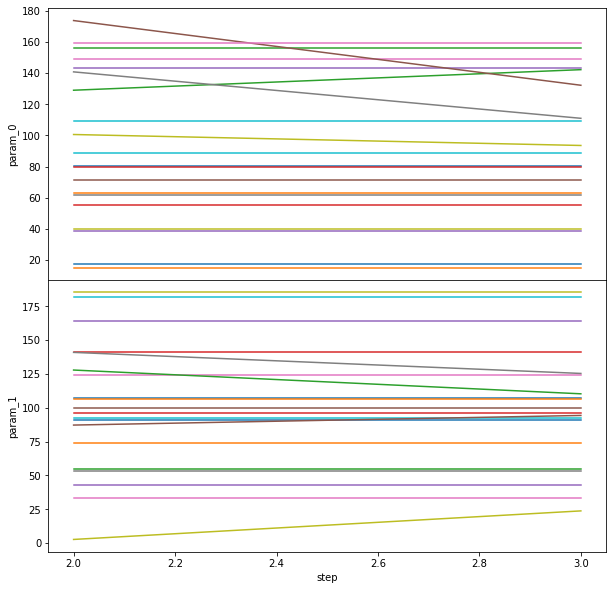

In [44]:

def plot_walker_paths(
        sampler,
        labels=None,
        min_iter = None,
        max_iter = None,
):
    nwalkers, niter, nparams = sampler.chain.shape
    labels = labels or [f"param_{i}" for i in range(nparams)]
    assert len(labels)==nparams, \
        "Number of labels must equal number of parameters in sampler."
    
    fig, ax = plt.subplots(nparams, sharex = True, figsize=(10,5*nparams))
    iter_range = slice(min_iter, max_iter)
    x = range(min_iter or 0, max_iter or niter)
    for i in range(nparams):
        for j in range(nwalkers):
            ax[i].plot(x, sampler.chain[j, iter_range, i])
        ax[i].set_ylabel(labels[i])
        ax[i].set_xlabel('step')
    fig.subplots_adjust(hspace=0)
    plt.setp(
        [a.get_xticklabels() for a in fig.axes[:-1]], 
        visible=False)

plot_walker_paths(sampler, labels=None, min_iter=2
                 )

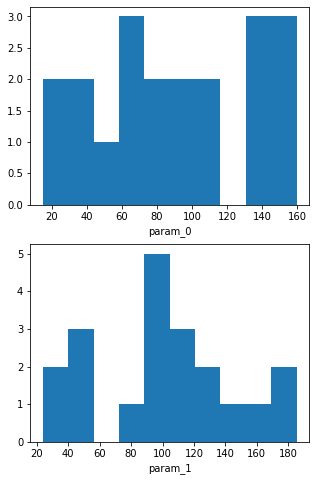

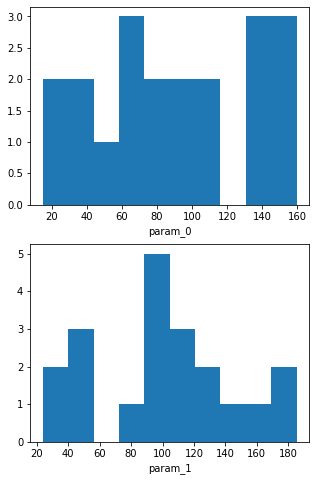

In [45]:
def plot_posterior_distributions(
        sampler,
        labels = None, 
        min_iter = None,
        max_iter = None
):
    nwalkers, _, nparams = sampler.chain.shape
    labels = labels or [f"param_{i}" for i in range(nparams)]
    assert len(labels)==nparams, \
        "Number of labels must equal number of parameters in sampler."
    fig = plt.figure(figsize=(5, 4*nparams))
    iter_range = slice(min_iter, max_iter)
    for i in range(nparams):
        ax = fig.add_subplot(nparams, 1, i+1)
        ax.hist(sampler.chain[:, iter_range, i].flatten())
        ax.set_xlabel(labels[i])
    return fig
    
    
plot_posterior_distributions(
        sampler,
min_iter=-1, max_iter=None)

In [36]:
sampler.chain.shape

(20, 4, 2)